# Cars and miles per gallon

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [202]:
df = pd.read_csv('auto-mpg.tsv', sep='\t', header=0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,-1,8,304.0,193,4732,18.5,70,1,hi 1200d
1,-1,8,307.0,200,4376,15.0,70,1,chevy c20
2,-1,8,360.0,215,4615,14.0,70,1,ford f250
3,-1,8,318.0,210,4382,13.5,70,1,dodge d200
4,-1,8,350.0,180,3664,11.0,73,1,oldsmobile omega


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    int64  
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


c:\Users\Aaryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


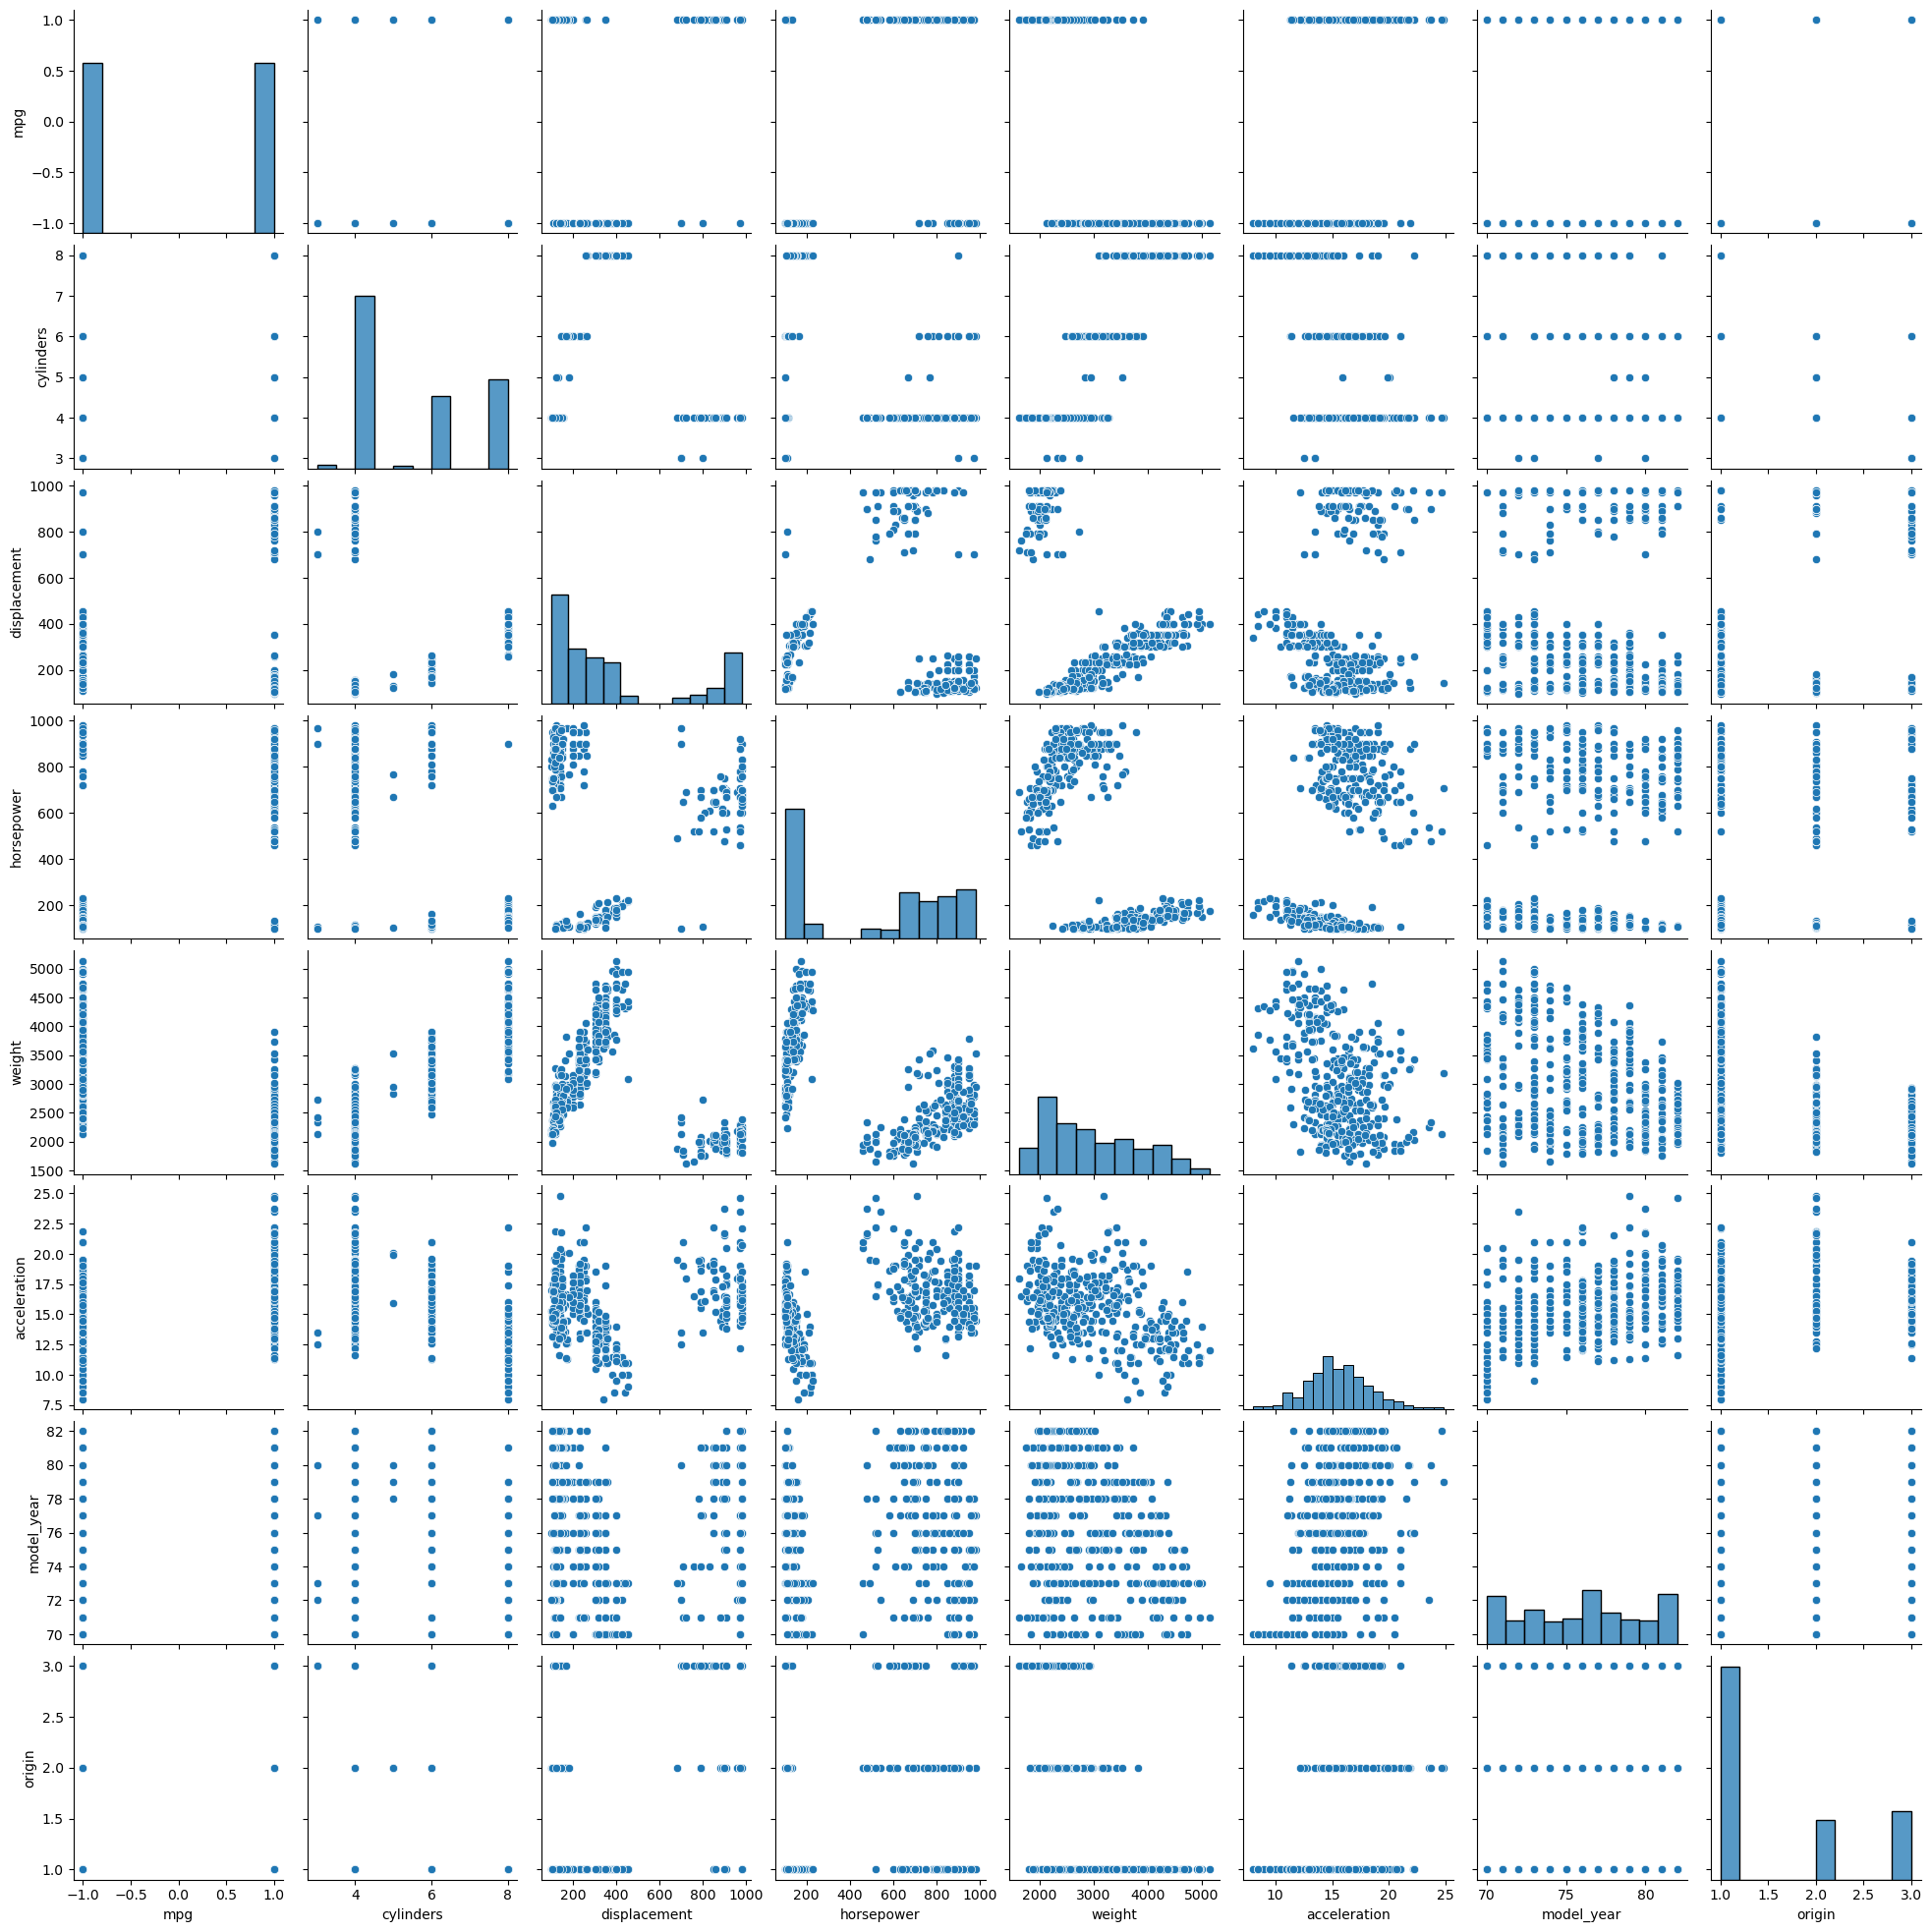

In [204]:
sns.pairplot(df)
plt.show()

## Data Cleaning

### Q1
*I have use standardization in all cases except origin so that all the variables have comparable values around their mean and scaled to the standard deviation.*
* Cylinders: I will standardize this variable as it the classifier considerable correlates to it but its values is much smaller than the rest of the variables. 
* Displacement:  Displacement is a continuous variable. Standardizing it will help in dealing with different scales and making the feature more comparable across different instances.
* Horsepower: Similarly, stanrdize.
* Weight:  Similarly, stanrdize.
* Acceleration: Its impact on fuel efficiency might not be linear but standardization retains the potential non-linear relationship.
* Model year: Although this is discrete, the values are too small to use raw. Too much dimensionality if i use one-hot.
* Origin: With 3 distnct values, it is not too many to use one - hot. Origin is a categorical variable. 
* Name: I will drop this.


In [205]:
df.origin.unique() 
df.cylinders.unique() # one-hot here will increase dimensions. Additionally, when i see the correlation matrix, cylinders considerably affect the outcome
df.model_year.unique() #again, dimensioanlity will increase with one hot. Plus 12 items are too many for this

array([70, 73, 72, 71, 75, 76, 74, 77, 79, 78, 81, 80, 82], dtype=int64)

In [206]:
cat_columns = ['origin']
num_columns = ['cylinders',	'displacement',	'horsepower', 'weight',	'acceleration', 'model_year']

# One-hot encoding categorical columns
df_cat_encoded = pd.get_dummies(df[cat_columns])

# Standardizing numerical columns
scaler = sk.preprocessing.StandardScaler()
df_num_standardized = pd.DataFrame(scaler.fit_transform(df[num_columns]), columns=num_columns)

# Combine back into a single DataFrame
DF = pd.concat([df_cat_encoded, df_num_standardized], axis=1) #features

DF2 = pd.concat([DF, df['mpg']], axis=1) #features + target


In [207]:
DF2.corr() #seeing how each feature affects the target

,origin,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
origin,1.000000,-0.568932,0.368264,0.352895,-0.585005,0.212746,0.181528,0.513698
cylinders,-0.568932,1.000000,-0.238708,-0.709525,0.897527,-0.504683,-0.345647,-0.759194
displacement,0.368264,-0.238708,1.000000,0.084837,-0.381734,0.173959,0.012157,0.333174
horsepower,0.352895,-0.709525,0.084837,1.000000,-0.643922,0.402398,0.223194,0.588761
weight,-0.585005,0.897527,-0.381734,-0.643922,1.000000,-0.416839,-0.309120,-0.757757
acceleration,0.212746,-0.504683,0.173959,0.402398,-0.416839,1.000000,0.290316,0.346822
model_year,0.181528,-0.345647,0.012157,0.223194,-0.309120,0.290316,1.000000,0.429904
mpg,0.513698,-0.759194,0.333174,0.588761,-0.757757,0.346822,0.429904,1.000000


<Axes: >

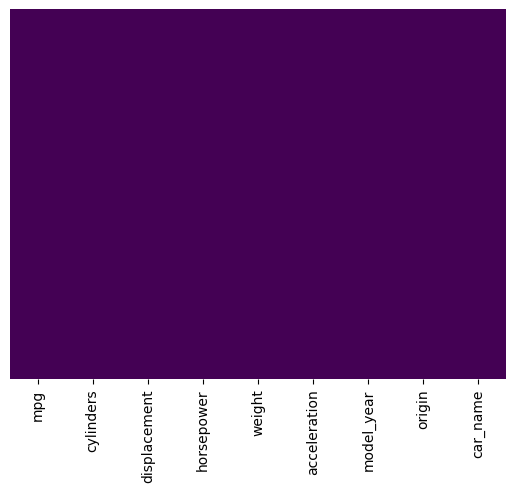

In [208]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #no data missing!

In [209]:
DF
#looks cleaned enough to me

,origin,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1,1.483947,-0.279256,-0.948157,2.068110,1.073795,-1.625315
1,1,1.483947,-0.269324,-0.927177,1.648456,-0.196464,-1.625315
2,1,1.483947,-0.093854,-0.882220,1.930190,-0.559396,-1.625315
3,1,1.483947,-0.232906,-0.897206,1.655529,-0.740861,-1.625315
4,1,1.483947,-0.126962,-0.987120,0.809149,-1.648189,-0.809884
...,...,...,...,...,...,...,...
387,2,-0.864014,1.693954,-0.087980,-0.757480,2.961037,1.092789
388,2,-0.864014,1.925707,0.031906,-0.999134,3.287676,1.636410
389,2,-0.864014,1.693954,-0.087980,-1.052181,2.235175,1.092789
390,3,-0.864014,1.727062,0.481476,-1.329199,-0.631982,1.092789


### Q2

* Logistic regression is a linear model that works with numerical features. Since 'car name' is a textual feature, it needs to be transformed into a numerical format. Here are a few methods:

* Label Encoding: Assign a unique number to each unique car name. However, this can imply an ordinal relationship between cars that doesn't exist.

* Frequency Encoding: Replace each car name with the frequency of that car name in the dataset. This captures the prevalence of each car but loses specific identity information.

* One-Hot Encoding: Create a new binary column for each unique car name. This method can lead to a very high-dimensional space if there are many unique car names, potentially leading to overfitting.

* Word Embeddings: Convert car names into vectors using techniques like TF-IDF or Word2Vec. This captures more nuanced semantic relationships but might be overkill and could introduce unnecessary complexity.

### Q3
* Decision trees can handle both numerical and categorical data. However, with high-cardinality categorical data like car names, specific transformation techniques can be beneficial:

* Label Encoding: This is more suitable for tree-based models compared to logistic regression, as decision trees can handle the arbitrary numeric values without assuming an ordinal relationship.

* One-Hot Encoding: Although feasible, it can lead to a very large number of features, potentially making the tree complex and prone to overfitting.

* Binary Encoding or Hashing: These are more compact than one-hot encoding and can be a good compromise between preserving information and managing dimensionality.
### Q4

The relevance of the car name variable to a dataset would generally be determined by the context. Here, there are more than 300 car names. Encoding this using one-hot would not be feasible with the amount of points. It would not be useful either as it does not reveal any meaningful information. Intuitively speaking, only the features of the car determine the fuel consumption which we already have.

In [210]:
df['car_name'].unique()

array(['hi 1200d', 'chevy c20', 'ford f250', 'dodge d200',
       'oldsmobile omega', 'chevrolet impala', 'mercury marquis',
       'oldsmobile delta 88 royale', 'oldsmobile vista cruiser',
       'dodge monaco (sw)', 'ford country', 'mercury marquis brougham',
       'buick electra 225 custom', 'ford mustang ii', 'ford f108',
       'ford gran torino (sw)', 'chevrolet chevelle concours (sw)',
       'dodge d100', 'plymouth volare premier v8', 'chevrolet malibu',
       'chevy c10', 'buick century luxus (sw)', 'buick lesabre custom',
       'buick century 350', 'ford ltd', 'plymouth custom suburb',
       'amc ambassador brougham', 'chevrolet caprice classic',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'chrysler newport royal', 'chrysler new yorker brougham',
       'ford gran torino', 'amc matador', 'amc matador (sw)',
       'plymouth satellite custom (sw)', 'plymouth fury iii',
       'plymouth fury gran sedan', 'dodge coronet custom (sw)',
       "plymouth 'cu

## Training and Testing

In [211]:
from sklearn.tree import DecisionTreeClassifier 

In [212]:
X = DF #Feature matrix asked in Q5
Y = DF2['mpg'] 

In [213]:
n = len(df) #find number of data points

p = np.random.permutation(n) #shuffle the data

Y = Y.iloc[p].reset_index(drop=True)
X = X.iloc[p].reset_index(drop=True)

In [214]:
def accuracy_score(a,b):  #find the accuracy score by calculating the mean of an array c storing whether the predicted value and actual value of Y match or not
    c = np.mean(a==b)
    return c

### Q6: 
Let us create the decision tree with cross validation

In [215]:
k = 10 #number of folds
f = n//k #size of each fold
criteria = ['gini', 'entropy', 'log_loss'] #criteria to be used

a = np.zeros([3,10]) #array to store accuracy scores for each fold and each criterion

for j in range(3) : #for each criterion

    for i in range(k):    #for each fold

        X_test = X.iloc[i*f:(i+1)*f] #testing data for each iteration
        Y_test = Y.iloc[i*f:(i+1)*f]
        
        X_train = X.drop(X_test.index) #training data for each iteration
        Y_train = Y.drop(Y_test.index)
        
        clf = DecisionTreeClassifier(criterion=criteria[j])
        clf.fit(X_train, Y_train) #fitting the model for the given criterion and given fold

        Y_pred = clf.predict(X_test) #testing the model on the test data 

        a[j][i] = accuracy_score(Y_test, Y_pred) #calculating accuracy
        #n = clf.score(X_test, Y_test) #calculating accuracy

In [216]:
print("average accuracy score for gini criterion is", np.mean(a[0]))
print("average accuracy score for entropy criterion is", np.mean(a[1]))
print("average accuracy score for log_loss criterion is", np.mean(a[2]))

average accuracy score for gini criterion is 0.8897435897435898
average accuracy score for entropy criterion is 0.9025641025641026
average accuracy score for log_loss criterion is 0.9179487179487179


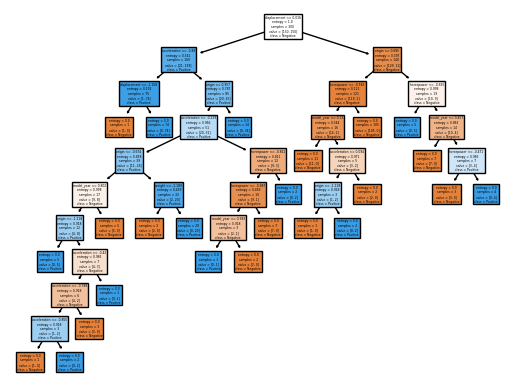

accuracy score for the model is 0.9565217391304348


In [217]:
clf = DecisionTreeClassifier(criterion='entropy')

Xt = X.iloc[0:300]
Yt = Y.iloc[0:300]

clf.fit(Xt, Yt) #Let us see what happens when we fit the model on the entire dataset and dont use cross validation

Xp = X.iloc[300:392]
Yp = Y.iloc[300:392]
Y_pred = clf.predict(Xp)

from sklearn.tree import plot_tree

plot_tree(clf, filled=True, feature_names= ['cylinders','displacement',	'horsepower', 'weight',	'acceleration', 'model_year','origin']
, class_names=["Negative", "Positive"])
plt.show() #cant see anything sorry

print("accuracy score for the model is", accuracy_score(Yp, Y_pred)) #really didnt make much difference??? 

### Bonus
Adding more features to the model will increase the accuracy score.
However, it will also increase the complexity of the model. 
So, its important to find the right balance between the two.
I will implement the same code with a few extra parameters to check the result

In [218]:
def bonus():
    
    k = 10 #number of folds
    f = n//k #size of each fold
    criteria = ['gini', 'entropy', 'log_loss'] #criteria to be used

    a = np.zeros([3,10]) #array to store accuracy scores for each fold and each criterion

    for j in range(3) : #for each criterion

        for i in range(k):    #for each fold

            X_test = X.iloc[i*f:(i+1)*f] #testing data for each iteration
            Y_test = Y.iloc[i*f:(i+1)*f]
            
            X_train = X.drop(X_test.index) #training data for each iteration
            Y_train = Y.drop(Y_test.index)
            
            clf = DecisionTreeClassifier(criterion=criteria[j], max_depth=5,
            min_samples_split=4,
            min_samples_leaf=2,
            max_features='sqrt',
            max_leaf_nodes=15,
            min_impurity_decrease=0.001,
            class_weight='balanced',
            random_state=42)
            
            clf.fit(X_train, Y_train) #fitting the model for the given criterion and given fold

            Y_pred = clf.predict(X_test) #testing the model on the test data 

            a[j][i] = clf.score(X_test, Y_test) #calculating accuracy




    return a


In [219]:
b = bonus()
print("average accuracy score for gini criterion is", np.mean(b[0]))
print("average accuracy score for entropy criterion is", np.mean(b[1]))
print("average accuracy score for log_loss criterion is", np.mean(b[2]))

average accuracy score for gini criterion is 0.9102564102564102
average accuracy score for entropy criterion is 0.9076923076923077
average accuracy score for log_loss criterion is 0.9076923076923077


In this example, the tree’s maximum depth is set to 5, it requires at least 4 samples to split an internal node, at least 2 samples to be at a leaf node, and the maximum number of leaf nodes is limited to 15. It also uses the square root of the number of features when looking for the best split and focuses on balancing class weights.

*We see that the given parameters are quite helpful when are using the gini criterion to build our decsion tree. In other cases, they do not make too much difference*